<a href="https://colab.research.google.com/github/ma2sevich222/study_projects/blob/main/horse_human_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import the necessary libraries

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Reshape
from keras.layers import Input,Dense,Flatten
from keras.models import Model
from google.colab import drive
from os import listdir
from matplotlib import image
from PIL import Image
import random

In [ ]:
drive.mount('/content/drive/') #mount google drive

Mounted at /content/drive/


In [ ]:
!ls


drive  sample_data


In [ ]:
!pwd
import os
os.chdir('/content/drive/My Drive') # set the working directory
!pwd

/content
/content/drive/My Drive


In [ ]:
dirrectory=listdir('horse_or_human/')

In [ ]:
random.shuffle(dirrectory) # shuffle file names in the directory so that they can be loaded in a random order

#Load data

In [ ]:
# load all images in a directory
loaded_images = list()
classes=list()
for filename in dirrectory:
  if filename[:5]=='horse':
    classes.append(0)
  else:
    classes.append(1)
	# load image
  img = Image.open('horse_or_human/' + filename)
  rsize = img.resize((np.array(img.size)/5).astype(int)) # resize images
  rsizeArr = np.asarray(rsize)
  rsizeArr=rsizeArr[:,:,:3] # delete alfa chanel
	# store loaded image
  loaded_images.append(rsizeArr)
  print('> loaded %s %s' % (filename, rsizeArr.shape))

> loaded horse15-8.png (60, 60, 3)
> loaded horse20-1.png (60, 60, 3)
> loaded horse34-5.png (60, 60, 3)
> loaded horse34-3.png (60, 60, 3)
> loaded human14-28.png (60, 60, 3)
> loaded horse39-2.png (60, 60, 3)
> loaded horse10-5.png (60, 60, 3)
> loaded human11-19.png (60, 60, 3)
> loaded horse24-9.png (60, 60, 3)
> loaded horse32-2.png (60, 60, 3)
> loaded horse08-5.png (60, 60, 3)
> loaded horse02-1.png (60, 60, 3)
> loaded horse31-2.png (60, 60, 3)
> loaded human05-26.png (60, 60, 3)
> loaded human10-24.png (60, 60, 3)
> loaded horse14-0.png (60, 60, 3)
> loaded human03-02.png (60, 60, 3)
> loaded human02-08.png (60, 60, 3)
> loaded human04-15.png (60, 60, 3)
> loaded horse06-3.png (60, 60, 3)
> loaded human05-22.png (60, 60, 3)
> loaded human05-09.png (60, 60, 3)
> loaded human11-30.png (60, 60, 3)
> loaded human16-17.png (60, 60, 3)
> loaded horse17-0.png (60, 60, 3)
> loaded human11-09.png (60, 60, 3)
> loaded horse39-6.png (60, 60, 3)
> loaded horse04-5.png (60, 60, 3)
> loaded

In [ ]:
print(classes[:10])

[0, 0, 0, 0, 1, 0, 0, 1, 0, 0]


In [ ]:
print(len(classes))
np.array(loaded_images).shape


1027


(1027, 60, 60, 3)

#create x_train and x_val

In [ ]:
xTrain=np.array(loaded_images[:827])
xVal=np.array(loaded_images[828:])

xTrain=(xTrain-xTrain.mean(axis=(0,1,2),keepdims=True))/xTrain.std(axis=(0,1,2),keepdims=True) #normalizing train data
xVal=(xVal-xVal.mean(axis=(0,1,2),keepdims=True))/xVal.std(axis=(0,1,2),keepdims=True)# normalizing validation data


#Model

In [ ]:
def a_encoder():
    
    encoding_dim = 10 # size of latent space
    imput_shape=(60,60,3) # image sie
    
    input_img = Input(shape=imput_shape)
    
    
    
    x = Conv2D(128, (2, 2), activation='relu',padding='same')(input_img)
    
    x= Conv2D(64, (2, 2), activation='relu',padding='same')(x)
    
    x= Conv2D(64, (2, 2), activation='softmax',padding='same')(x)
    
    
    
    x=Flatten()(x)
    
    z= Dense(encoding_dim, activation='softmax',name='latent_space')(x)
    
    x = Dense(60*60*3, activation='sigmoid')(z)
    
    x = Reshape((60, 60, 3))(x)
    
    
    encoder = Model(input_img,x)
    
    
    
    encoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    encoder.fit(xTrain, xTrain,
                epochs=10,
                batch_size=10,validation_data=(xVal,xVal))
    
    return encoder

#Train model

In [ ]:
auto_encoder=a_encoder()

Epoch 1/10
83/83 [==============================] - 32s 387ms/step - loss: 0.6581 - val_loss: 0.6234
Epoch 2/10
83/83 [==============================] - 32s 387ms/step - loss: 0.5899 - val_loss: 0.5608
Epoch 3/10
83/83 [==============================] - 32s 382ms/step - loss: 0.5308 - val_loss: 0.5062
Epoch 4/10
83/83 [==============================] - 31s 368ms/step - loss: 0.4784 - val_loss: 0.4574
Epoch 5/10
83/83 [==============================] - 31s 370ms/step - loss: 0.4314 - val_loss: 0.4141
Epoch 6/10
83/83 [==============================] - 34s 405ms/step - loss: 0.3893 - val_loss: 0.3751
Epoch 7/10
83/83 [==============================] - 31s 375ms/step - loss: 0.3515 - val_loss: 0.3402
Epoch 8/10
83/83 [==============================] - 32s 382ms/step - loss: 0.3173 - val_loss: 0.3083
Epoch 9/10
83/83 [==============================] - 30s 365ms/step - loss: 0.2861 - val_loss: 0.2790
Epoch 10/10
83/83 [==============================] - 31s 370ms/step - loss: 0.2575 - val_lo

In [ ]:
Pre_trained=auto_encoder.layers.pop() # Create 2 model based on the first but without the last layer
Pre_trained=Model(inputs=auto_encoder.inputs,outputs=auto_encoder.layers[-3].output) # Disconnect the last three layers so that the output will be z

data=Pre_trained.predict(xTrain) # predict data to the new model, the output z
print(data.shape)

(827, 10)


In [ ]:
import matplotlib.pyplot as plt# import matplotlib for plotting


if we want to find optimal number of clusters (k), for each value of k, we  initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre

In [ ]:
sum_of_squared_distances = []
K = range(1,15) #number of clusters
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(data) #fit our data from z layer
    sum_of_squared_distances.append(k_means.inertia_) #calculate sum of squared distances

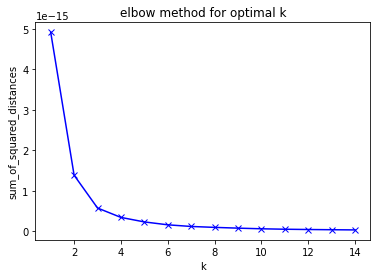

In [ ]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

#You can see from the diagram that the division into 2 clusters is appropriate